In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load idx2class csv file and load it into a dictionary
idx2class_csv = '/mnt/disks/large/data/labels.csv'
df = pd.read_csv(idx2class_csv)

idx2class = {}
for i in range(len(df)):
    idx2class[df.iloc[i,0]] = df.iloc[i,1]
print(idx2class)

{0: 'culture::abruzzi', 1: 'culture::achaemenid', 2: 'culture::aegean', 3: 'culture::afghan', 4: 'culture::after british', 5: 'culture::after german', 6: 'culture::after german original', 7: 'culture::after italian', 8: 'culture::after russian original', 9: 'culture::akkadian', 10: 'culture::alexandria-hadra', 11: 'culture::algerian', 12: 'culture::alsace', 13: 'culture::american', 14: 'culture::american or european', 15: 'culture::amsterdam', 16: 'culture::ansbach', 17: 'culture::antwerp', 18: 'culture::apulian', 19: 'culture::arabian', 20: 'culture::aragon', 21: 'culture::arica', 22: 'culture::asia minor', 23: 'culture::assyrian', 24: 'culture::atlantic watershed', 25: 'culture::attic', 26: 'culture::augsburg', 27: 'culture::augsburg decoration', 28: 'culture::augsburg original', 29: 'culture::austrian', 30: 'culture::avignon', 31: 'culture::avon', 32: 'culture::aztec', 33: 'culture::babylonian', 34: 'culture::babylonian or kassite', 35: 'culture::bactria-margiana archaeological comp

In [17]:
results_dir = '/mnt/disks/large/output/cnnrnn_final/test/test-01/dev_visualization'

In [18]:
with open(results_dir, 'rb') as f:
    results_attn = pickle.load(f)

In [19]:
labels_pred = results_attn['labels_pred']
alphas = results_attn['alphas']
imgs = results_attn['imgs']
ids = results_attn['orig_id']

In [20]:
print(labels_pred.shape) # (batch_size * ncrops, NUM_CLASSES)
print(alphas.shape) # (batch_size * ncrops, MAX_LABEL_LENGTH, 14*14)
print(imgs.shape) # (batch_size, ncrops, n_channels, 224, 224)
print(len(ids))

#alphas = alphas.reshape([240, 10, 14, -1])
imgs = imgs.reshape([-1, 3, 224, 224])
imgs = np.transpose(imgs, (0, 2, 3, 1))

print(imgs.shape)

(240, 1103)
(240, 10, 196)
(40, 6, 3, 224, 224)
40
(240, 224, 224, 3)


In [21]:
## Check which images have predicted labels
print(np.sum(labels_pred, axis=1))

[10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  2.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  8.  1.  1.
 10.  1.  5.  2.  2.  3. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  2.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1. 10. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  4.  1.  2.  1.  2.
 10.  1.  1.  1.  1.  1.  8.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1. 10.  1.  1.  1.  1.  1.
 10.  1.  1.  1.  1.  1.]


In [22]:
## Adapted from https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Image-Captioning/blob/master/caption.py
## Function to visualize attention map for one image
def visualize_att(image, pred_labels, alphas, idx2class, smooth=True):
    """
    Visualizes caption with weights at every word.
    Adapted from paper authors' repo: https://github.com/kelvinxu/arctic-captions/blob/master/alpha_visualization.ipynb
    Args:
        img_path: path to image
        pred_labels: predicted labels one-hot encoded, size (NUM_CLASSES,)
        alphas: attention weights, size (MAX_LABEL_LENGTH, 14 * 14)
        idx2class: dictionary mapping indices to class names
        smooth: boolean, whether smooth weights
    """
    #image = Image.open(img_path)
    #image = image.resize([14 * 50, 14 * 50])
    #image = image.resize([14 * 24, 14 * 24], Image.LANCZOS)
    #image = image.resize([224, 224], Image.LANCZOS)

    label_nums = np.argwhere(pred_labels == 1.0).reshape(-1).tolist()
    num_pred = len(label_nums)
    
    plt.subplot()
    
    
    for t, lab in enumerate(label_nums):
        plt.subplot(np.ceil(num_pred / 5.), 5, t + 1)
        
        plt.text(0, 1, '%s' % (idx2class[lab]), color='black', backgroundcolor='white', fontsize=12)
        plt.imshow(image)
        current_alpha = alphas[t, :].reshape(14, 14)
        if smooth:
            alpha = skimage.transform.pyramid_expand(current_alpha, upscale=16, sigma=50)
       #     alpha = skimage.transform.pyramid_expand(current_alpha, upscale=1, sigma=8)
        else:
            alpha = skimage.transform.resize(current_alpha, [14 * 16, 14 * 16])
        #if t == 0:
        #    plt.imshow(alpha, alpha=0)
        #else:
        #print(alpha)
        
        plt.imshow(alpha, alpha=0.9)
        plt.set_cmap(cm.Greys_r)
        #plt.set_cmap('binary')
        plt.axis('off')
    plt.show()


In [23]:
# Ground truth labels
test_label_file = '/mnt/disks/large/data/train_split/train_split_val.csv'
#test_label_file = '/mnt/disks/large/debug_data/train_split_val.csv'
label_df = pd.read_csv(test_label_file)

ffa35138b5c65d75.png


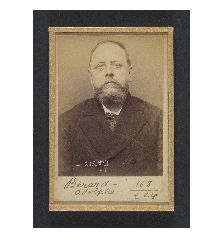

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


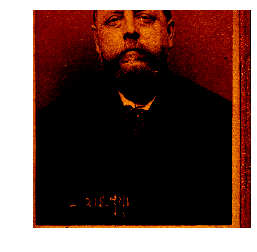

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['tag::men', 'tag::portraits']


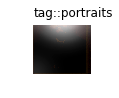

In [68]:
import os
from PIL import Image
import skimage
import matplotlib.cm as cm

test_img_dir = '/mnt/disks/large/data/train_split/val'
#test_img_dir = '/mnt/disks/large/debug_data/val'

#id_idx = 4
#idx = id_idx * 6 + 2

#id_idx = 8
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

#id_idx = 19
#idx = id_idx * 6 + 1

id_idx = 26
idx = id_idx * 6 + 2

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img, pred_label, alpha, idx2class, smooth=True)

ff1a3089fee4a621.png


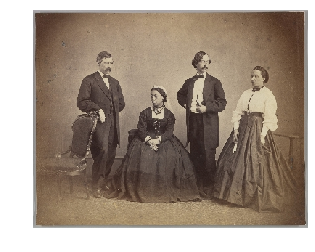

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


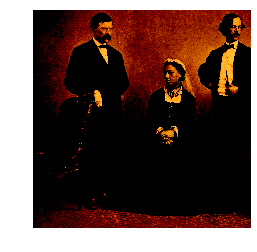

(224, 224, 3)
['tag::men', 'tag::women']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


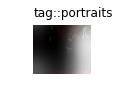

In [69]:
id_idx = 4
idx = id_idx * 6 + 2

#id_idx = 8
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

#id_idx = 19
#idx = id_idx * 6 + 1

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img, pred_label, alpha, idx2class, smooth=True)

ff6b467ea0c369d2.png


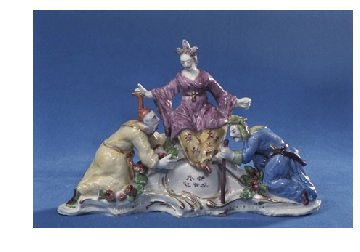

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


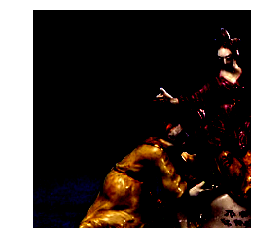

(224, 224, 3)
['culture::bow', 'culture::british', 'culture::london', 'tag::goddess', 'tag::inscriptions', 'tag::men', 'tag::worshiping']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


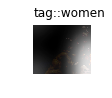

In [72]:
#id_idx = 4
#idx = id_idx * 6 + 2

#id_idx = 13
#idx = id_idx * 6 + 1

id_idx = 19
idx = id_idx * 6 + 1

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img, pred_label, alpha, idx2class, smooth=True)

ff327934a1da925c.png


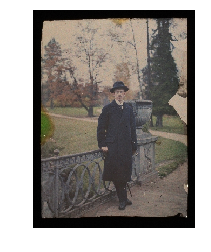

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


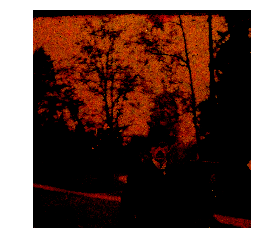

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
['tag::men', 'tag::trees']


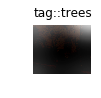

In [75]:
id_idx = 8
idx = id_idx * 6 + 2

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img, pred_label, alpha, idx2class, smooth=True)

ff49e013eb9c3b29.png


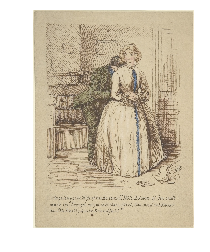

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


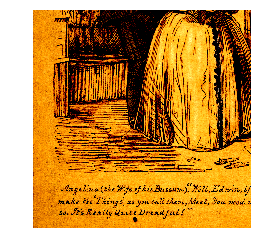

(224, 224, 3)
['culture::british', 'tag::men', 'tag::women']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


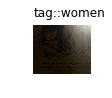

In [76]:
id_idx = 13
idx = id_idx * 6 + 1

img_path = os.path.join(test_img_dir, ids[id_idx])
pred_label = labels_pred[idx, :]
alpha = alphas[idx, :]
print(ids[id_idx])
#print(alpha[0,:])

# Show raw image
raw_img = Image.open(img_path)
plt.imshow(raw_img)
plt.axis('off')
plt.show()


img = imgs[idx,:]
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)


# Print ground truth labels
curr_id = ids[id_idx].strip('.png')
idx_eg = label_df.index[label_df['id'] == curr_id]
orig_label = label_df.iloc[idx_eg,1].tolist()
orig_label = orig_label[0].split(' ')
orig_label_names = []
for l in orig_label:
    orig_label_names.append(idx2class[int(l)])
print(orig_label_names)

# Show attention
visualize_att(img, pred_label, alpha, idx2class, smooth=True)